Got this from Frossie

https://github.com/lsst-sqre/system-test/blob/main/dp03-tap-test.ipynb


### Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lsst.rsp import get_tap_service
import os

pd.set_option('display.max_rows', 100)

service = get_tap_service("ssotap")
print(service.baseurl)

https://data.lsst.cloud/api/ssotap


### Cone Search

In [2]:
df = service.search("""
    SELECT SSObjectId, ra, decl FROM dp03_catalogs.DiaSource where 1=CONTAINS(POINT('ICRS', ra, decl), CIRCLE('ICRS', 1.0, 0, 0.05))
""").to_table().to_pandas()
df

,SSObjectId,ra,decl
0,-6980004938777710728,1.013669,0.030917
1,-6980004938777710728,1.009650,0.029645
2,-6763237542171065970,1.007016,0.005907
3,-6763237542171065970,1.002606,0.005329
4,7620415667079479232,0.966819,-0.014512
...,...,...,...
1252,-1862606219238398501,1.018978,-0.045408
1253,-1862606219238398501,1.022724,0.012205
1254,-1862606219238398501,1.022507,0.011675
1255,-1862606219238398501,1.022744,0.012228


<AxesSubplot: xlabel='ra', ylabel='decl'>

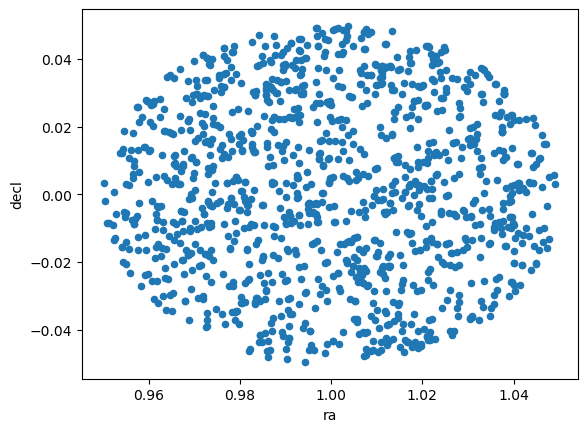

In [3]:
df.plot.scatter('ra','decl')

### Polygon

In [4]:
df = service.search("""
    SELECT SSObjectId, ra, decl FROM dp03_catalogs.DiaSource where 1=CONTAINS(POINT('ICRS', ra, decl), POLYGON('ICRS', 0.95, -.05, 1.05, -.05, 1.0, .05))
""").to_table().to_pandas()
df

,SSObjectId,ra,decl
0,-6980004938777710728,1.009650,0.029645
1,-6763237542171065970,1.007016,0.005907
2,-6763237542171065970,1.002606,0.005329
3,8296886766856815261,0.989268,-0.040824
4,8296886766856815261,0.986261,-0.043333
...,...,...,...
763,8793280577792067609,0.963681,-0.024752
764,-7270809550766707452,0.972710,-0.008424
765,-7270809550766707452,0.970680,-0.010152
766,-1862606219238398501,1.018998,-0.045213


<AxesSubplot: xlabel='ra', ylabel='decl'>

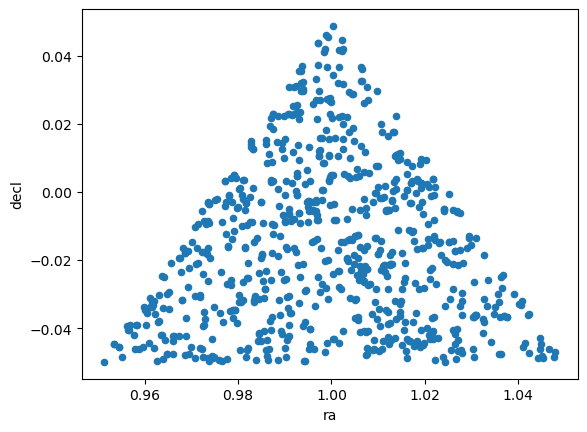

In [5]:
df.plot.scatter('ra','decl')

### Time Series Length Distribution

In [6]:
df = service.search("SELECT numObs, LOG(count(*)) FROM dp03_catalogs.SSObject GROUP BY numObs").to_table().to_pandas()
df

,numObs,LOG
0,1,6.035707
1,2,5.772689
2,3,5.607212
3,4,5.494146
4,5,5.404113
...,...,...
2963,8141,0.000000
2964,9650,0.000000
2965,11374,0.000000
2966,12912,0.000000


<AxesSubplot: xlabel='numObs'>

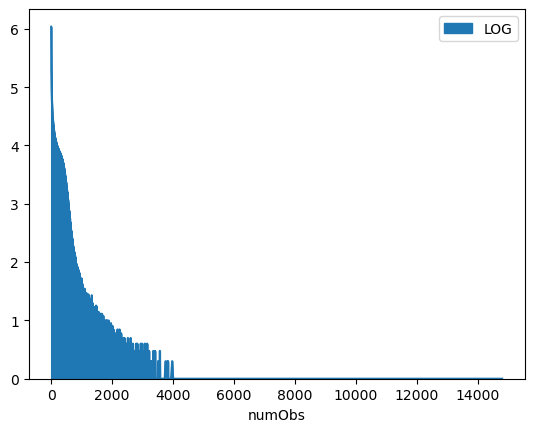

In [7]:
df.plot.area('numObs', 'LOG')

### Examine the longest time series a bit...

In [8]:
service.search("SELECT SSObjectId, numobs FROM dp03_catalogs.SSObject WHERE numobs>14000").to_table()

SSObjectId,numobs
int64,int32
-735085100561880491,14785


In [9]:
df = service.search("""
    SELECT ra, decl, midPointTai FROM dp03_catalogs.DiaSource WHERE ssObjectId = -735085100561880491
""").to_table().to_pandas()
df

,ra,decl,midPointTai
0,150.274417,1.034925,61099.125907
1,150.399773,0.987938,61092.129499
2,150.399331,0.988096,61092.153449
3,150.487713,0.957105,61087.267393
4,150.347588,1.007043,61095.024664
...,...,...,...
14780,156.989279,-1.956136,63709.124366
14781,156.989086,-1.955973,63709.148679
14782,156.936209,-1.910507,63716.069571
14783,156.936052,-1.910356,63716.093759


<AxesSubplot: xlabel='ra', ylabel='decl'>

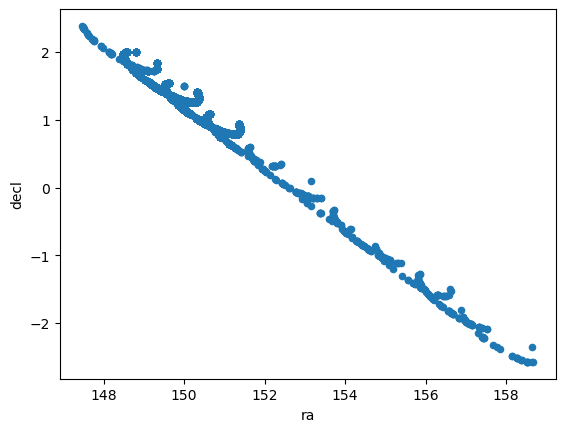

In [10]:
df.plot.scatter('ra','decl')

<AxesSubplot: xlabel='midPointTai', ylabel='decl'>

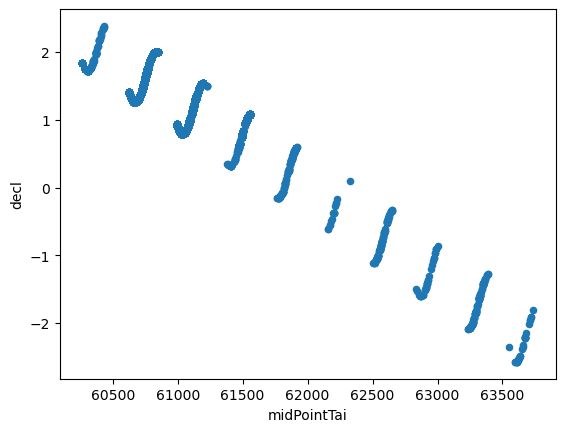

In [11]:
df.plot.scatter('midPointTai', 'decl')

<AxesSubplot: >

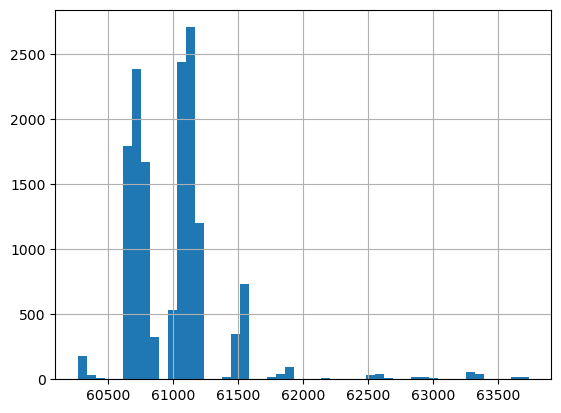

In [12]:
df['midPointTai'].hist(bins=50)